# Evaluation of algorithm performance and model selection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import cartopy.crs as ccrs

In [2]:
# select version
ver='1.1.1.1.2.4'
date2='04132024'
dirout='/glade/derecho/scratch/ito/ML4O2_temp/'
dirfin='/glade/campaign/univ/ugit0034/ML4O2_results/'

In [3]:
selection = ver.split('.')
basin = ['Atlantic','Pacific','Indian','Southern','Arctic']
#
if selection[0] == '1':
    print('Random Forst algorithm will be used.')
    alg = 'RF'
elif selection[0] == '2':
    print('Neural Network algorithm will be used.')
    alg = 'NN'
else:
    print('error - incorrect algorithm type')
#
if selection[1] == '1':
    print('Ship-based O2 data will be used. Year_end = 2011')
    endyear=2011
elif selection[1] == '2':
    print('Ship-based and Argo-O2 data will be used. Year_end = 2021')
    endyear=2021
else:
    print('error - incorrect input data type')
#
if selection[2] == '1':
    print(basin[int(selection[2])-1]+' Ocean will be mapped')
elif selection[2] == '2':
    print(basin[int(selection[2])-1]+' Ocean will be mapped')
elif selection[2] == '3':
    print(basin[int(selection[2])-1]+' Ocean will be mapped')
elif selection[2] == '4':
    print(basin[int(selection[2])-1]+' Ocean will be mapped')
elif selection[2] == '5':
    print(basin[int(selection[2])-1]+' Ocean will be mapped')
else:
    print('error - incorrect O2 data type')
#
if selection[3] == '1':
    print('EN4 dataset will be used for T/S input. ')
else:
    print('error - incorrect T/S data type')
#
if selection[4] == '1':
    print('Predictor variables include T, S, lon, lat, depth (pressure), year, month')
elif selection[4] == '2':
    print('Predictor variables include T, S, lon, lat, depth (pressure), year, cos(month), sin(month)')
elif selection[4] == '3':
    print('Predictor variables include T, S, lon, lat, depth (pressure), year, cos(month), sin(month), sigma')
elif selection[4] == '4':
    print('Predictor variables include T, S, lon, lat, depth (pressure), year, cos(month), sin(month), sigma, N2')
else:
    print('error - incorrect predictor variable type')
#
if selection[5] == '1':
    print('Hyperparameter set is optimized via K-fold CV')
elif selection[5] == '2':
    print('A pre-set hyperparameter set is used')
elif selection[5] == '4':
    print('New K-fold cross validation')
else:
    print('error - incorrect hyperparameter type')

Random Forst algorithm will be used.
Ship-based O2 data will be used. Year_end = 2011
Atlantic Ocean will be mapped
EN4 dataset will be used for T/S input. 
Predictor variables include T, S, lon, lat, depth (pressure), year, cos(month), sin(month)
New K-fold cross validation


In [4]:
# calculate R2 and RMSE for each trained algorithm
#
R2=np.zeros((5,3,6))
RMSE=np.zeros((5,3,6))
#
tmp=np.load(dirout+f'ML_params_v{ver}.npz')
ystd=tmp['ystd']
#
for parm1 in range(6):
    for parm2 in range(3):
        for k in range(5):
            if alg =='NN':
                tmp = np.load(dirout+f'NNtest_pred_v{ver}_cv{k}_{parm1}_{parm2}.npz')
            elif alg=='RF':
                tmp = np.load(dirout+f'RFtest_pred_v{ver}_cv{k}_{parm1}_{parm2}.npz')
            test=tmp['test']
            est=tmp['est']
            temp=np.corrcoef(est,test)
            R2[k,parm2,parm1]=temp[0,1]**2
            RMSE[k,parm2,parm1]=np.sqrt(np.mean((est-test)**2))*ystd

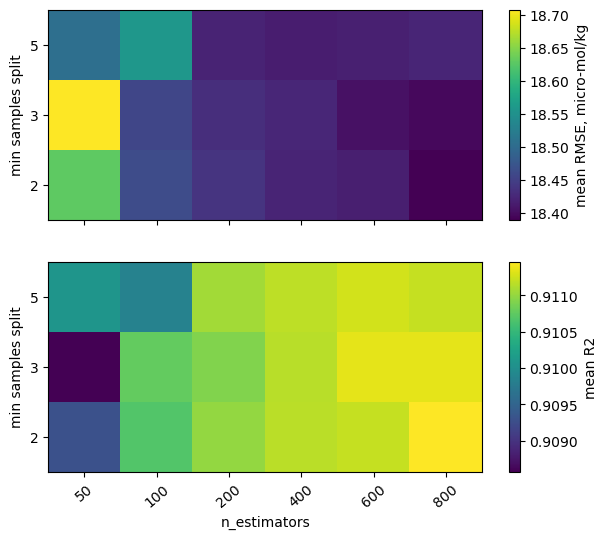

In [5]:
# Plot the result
#
if alg=='RF':
    xticks=['50','100','200','400','600','800']
    yticks=['2','3','5']
elif alg=='NN':
    xticks=['10x4','20x4','40x4','60x4','60-40-20-10','20x6-10-5']
    yticks=['0.001','0.01','0.1'] 
#
fig=plt.figure(figsize=(7,6))
ax=fig.subplots(2,1)
ax=ax.flatten()
#
tmp1=np.mean(RMSE,axis=0)
plt.subplots_adjust(wspace=0.3)
im=ax[0].pcolor(tmp1)
plt.colorbar(im,ax=ax[0],label='mean RMSE, micro-mol/kg',location='right')
ax[0].set_xticks(np.arange(0.5,6.5,1),[])
ax[0].set_yticks([.5,1.5,2.5],yticks)
#
tmp2=np.mean(R2,axis=0)
im=ax[1].pcolor(tmp2)
plt.colorbar(im,ax=ax[1],label='mean R2',location='right')
ax[1].set_xticks(np.arange(0.5,6.5,1),xticks,rotation=40)
ax[1].set_yticks([.5,1.5,2.5],yticks)
#
if alg=='RF':
    ax[1].set_xlabel('n_estimators')
    ax[0].set_ylabel('min samples split')
    ax[1].set_ylabel('min samples split')
elif alg=='NN':
    ax[1].set_xlabel('hidden layers')
    ax[0].set_ylabel('regularization')
    ax[1].set_ylabel('regularization')
   
#
#ax[1].set_xlabel('nodes in hidden layers')
#ax[1].set_ylabel('regularization')
#
plt.savefig(f'HPtuning_v{ver}.pdf',bbox_inches='tight')

In [6]:
# Display the ranking based on RMSE performance
# tmp1 = mean RMSE scores
xx,yy = np.meshgrid(xticks,yticks)
array=tmp1.flatten()
temp = array.argsort()
ranks1 = np.empty_like(temp)
ranks1[temp] = np.arange(len(array))
#
ranks = ranks1.reshape(3,6)
#
for n in range(6):
    ind = (ranks == n)
    print(f'The #{n+1} best performing case is with n_estimator={xx[ind][0]} and min samples split ={yy[ind][0]} with the mean K-fold RMSE={np.round(tmp1[ind][0],4)}')

The #1 best performing case is with n_estimator=800 and min samples split =2 with the mean K-fold RMSE=18.3896
The #2 best performing case is with n_estimator=800 and min samples split =3 with the mean K-fold RMSE=18.3964
The #3 best performing case is with n_estimator=600 and min samples split =3 with the mean K-fold RMSE=18.4034
The #4 best performing case is with n_estimator=400 and min samples split =5 with the mean K-fold RMSE=18.4155
The #5 best performing case is with n_estimator=600 and min samples split =2 with the mean K-fold RMSE=18.416
The #6 best performing case is with n_estimator=600 and min samples split =5 with the mean K-fold RMSE=18.417


## The best performing case will be retained for projection
- It is possible to override this decision
- ranks == 0 : 1st in mean RMSE score (default)
- ranks == 1 : 2nd
- ranks == 2 : 3rd

In [7]:
xx,yy = np.meshgrid(np.arange(0,6,1),np.arange(0,3,1))
parm1 = xx[ranks==0][0]
parm2 = yy[ranks==0][0]
print(parm1,parm2)

5 0


In [8]:
# Read from the saved input data file
tmp=np.load(dirout+f'train_test_v{ver}_{date2}.npz')
X_train = tmp['X_train']
X_test  = tmp['X_test']
y_train = tmp['y_train']
y_test  = tmp['y_test']

In [9]:
RF_parameters = {'n_estimators':[50,100,200,400,600,800],'min_samples_split':[2,3,5]}
NN_parameters = {'hidden_layer_sizes':[[10,10,10,10],[20,20,20,20],[40,40,40,40],
                                       [60,60,60,60],[60,40,20,10],[20,20,20,20,20,20,10,5]],
                 'alpha':[.001, .01, .1]}

In [10]:
def train_all(parm1,parm2):
    if alg =='RF':
        from sklearn.ensemble import RandomForestRegressor
        msp=RF_parameters['min_samples_split'][parm2]
        nest=RF_parameters['n_estimators'][parm1]
        msl=5
        regr=RandomForestRegressor(n_jobs=-1,n_estimators=nest,min_samples_split=msp,
                                   min_samples_leaf=msl,max_features='sqrt')
    elif alg == 'NN':
        from sklearn.neural_network import MLPRegressor
        hls=NN_parameters['hidden_layer_sizes'][parm1]
        alp=NN_parameters['alpha'][parm2]
        regr=MLPRegressor(max_iter=1000,hidden_layer_sizes=hls,alpha=alp)
    #
    regr.fit(X_train, y_train)
    tmp = np.load(dirout+f'ML_params_v{ver}.npz')
    y_est = regr.predict(X_test)
    rmse = np.sqrt(np.mean((y_est - y_test)**2))
    #
    np.savez(dirfin+f'o2test_pred_v{ver}.npz',Xtest=X_test,test=y_test*tmp['ystd']+tmp['ym'],est=y_est*tmp['ystd']+tmp['ym'])
    #
    filename = dirfin+f'algorithm_v{ver}.sav'
    joblib.dump(regr, filename)
    return rmse

In [12]:
# Re-train the best-performing algorithm with all training data
rmse = train_all(parm1,parm2)

In [13]:
# Keep scaling data for record
tmp = np.load(dirout+f'ML_params_v{ver}.npz')
np.savez(dirfin+f'ML_params_v{ver}.npz',Xm=tmp['Xm'],Xstd=tmp['Xstd'],
         ym=tmp['ym'],ystd=tmp['ystd'])

In [14]:
print(f'The final RMSE w.r.t the test data is = {np.round(rmse*tmp['ystd'],4)}')

The final RMSE w.r.t the test data is = 16.7361


In [15]:
# Now the algorithm is ready for projection!!!

## More in-depth comparison
- Spatial pattern of misfit between test data and ML estimates
- Start by generating a function that retrieves the spatial information

In [16]:
def rev_trans_validation(basin,nver):
    # get the data first
    params = np.load(f'/glade/campaign/univ/ugit0034/ML4O2_results/ML_params_v{ver}.npz')
    test = np.load(f'/glade/campaign/univ/ugit0034/ML4O2_results/o2test_pred_v{ver}.npz')
    R2=np.zeros(5)
    RMSE=np.zeros(5)
    #
    # read in X, Y, Z coordinates
    Xm = params['Xm']
    Xstd = params['Xstd']
    ym = params['ym']
    ystd=params['ystd']
    #
    X = test['Xtest'][:,2]*Xstd[2] + Xm[2]
    Y = test['Xtest'][:,3]*Xstd[3] + Xm[3]
    Z = test['Xtest'][:,4]*Xstd[4] + Xm[4]
    YR= test['Xtest'][:,5]*Xstd[5] + Xm[5]
    MO= test['Xtest'][:,6]*Xstd[6] + Xm[6]
    sect=np.zeros(np.size(X))
    #
    # transform X, Y into long180 and lati for the Southern Ocean
    # and subdivide into sectors
    if basin==4:
        # Basin boundaries
        BB = [-130,-60,20,90,160,230]
        SOsector = ['Bellingshausen-Amundsen Sea','Weddell Sea','South Indian Ocean',
             'Southwestern Pacific Ocean','Ross Sea']
        tang = Y/X
        long180=np.zeros(np.size(X))
        long = np.arctan(tang)
        d1 = (X>0)&(Y>0)
        d2 = (X<=0)&(Y>0)
        d3 = (X<=0)&(Y<=0)
        d4 = (X>0)&(Y<=0)
        #
        long180[d1]=long[d1]
        long180[d2]=long[d2]+np.pi
        long180[d3]=long[d3]-np.pi
        long180[d4]=long[d4]
        long180 = long180/np.pi*180+20
        #
        offset=(long180>180)
        long180[offset]=long180[offset]-360
        offset=(long180<-180)
        long180[offset]=long180[offset]+360
        lati=np.sqrt(X**2 + Y**2)-90
        #
        # Give a sector (sub-basin) flags
        for n in range(5):
            if n == 4:
                selb = (long180>=BB[n])|(long180<BB[0])
            else:
                selb = (long180>=BB[n])&(long180<BB[n+1])
            o2est = test['est']
            o2test= test['test']
            #
            tmp=np.corrcoef(o2est[selb],o2test[selb])
            R2[n] = tmp[0,1]**2
            RMSE[n] = np.sqrt(np.mean((o2est[selb]-o2test[selb])**2))
            sect[selb]=n
    # if not in the Southern Ocean, return the whole basin info.
    elif basin==5:
        tang = Y/X
        long180=np.zeros(np.size(X))
        long = np.arctan(tang)
        d1 = (X>0)&(Y>0)
        d2 = (X<=0)&(Y>0)
        d3 = (X<=0)&(Y<=0)
        d4 = (X>0)&(Y<=0)
        #
        long180[d1]=long[d1]
        long180[d2]=long[d2]+np.pi
        long180[d3]=long[d3]-np.pi
        long180[d4]=long[d4]
        long180 = long180/np.pi*180+20
        #
        offset=(long180>180)
        long180[offset]=long180[offset]-360
        offset=(long180<-180)
        long180[offset]=long180[offset]+360
        lati=-np.sqrt(X**2 + Y**2)+90
        #
        o2est = test['est']
        o2test= test['test']
        sect=0
        tmp=np.corrcoef(o2est,o2test)
        R2 = tmp[0,1]**2
        RMSE = np.sqrt(np.mean((o2est-o2test)**2))
    else:
        long180 = X+20
        lati = Y
        o2est = test['est']
        o2test= test['test']
        sect=0
        tmp=np.corrcoef(o2est,o2test)
        R2 = tmp[0,1]**2
        RMSE = np.sqrt(np.mean((o2est-o2test)**2))
    #
    return R2,RMSE,lati,long180,Z,o2est,o2test,sect,YR,MO

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


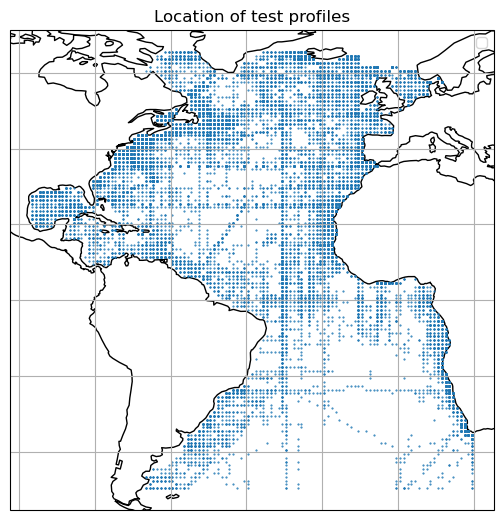

In [17]:
basin=int(selection[2])
#
R2,RMSE,lat,lon,depth,o2est,o2test,sect,YR,MO = rev_trans_validation(basin,0)
fig=plt.figure(figsize=[7,6])
if basin==4:
    ax=fig.add_axes([.1,.1,.8,.8],projection=ccrs.Stereographic(central_latitude=-90))
    for n in range(5):
        cond=(sect==n)&(depth<20)
        ax.plot(lon[cond],lat[cond],'.',markersize=1,transform=ccrs.PlateCarree(),label=SOsector[n])
elif basin ==5:
    ax=fig.add_axes([.1,.1,.8,.8],projection=ccrs.Stereographic(central_latitude=90))
    cond=(depth<=10)
    ax.plot(lon[cond],lat[cond],'.',markersize=1,transform=ccrs.PlateCarree())
#    
else:
    ax=fig.add_axes([.1,.1,.8,.8],projection=ccrs.PlateCarree())
    cond=(depth<=10)
    ax.plot(lon[cond],lat[cond],'.',markersize=1,transform=ccrs.PlateCarree())
#
ax.coastlines()
ax.gridlines()
ax.set_title('Location of test profiles')
plt.legend(bbox_to_anchor=(1,1))
plt.savefig(f'test_data_location_v{ver}.pdf',bbox_inches='tight')
#

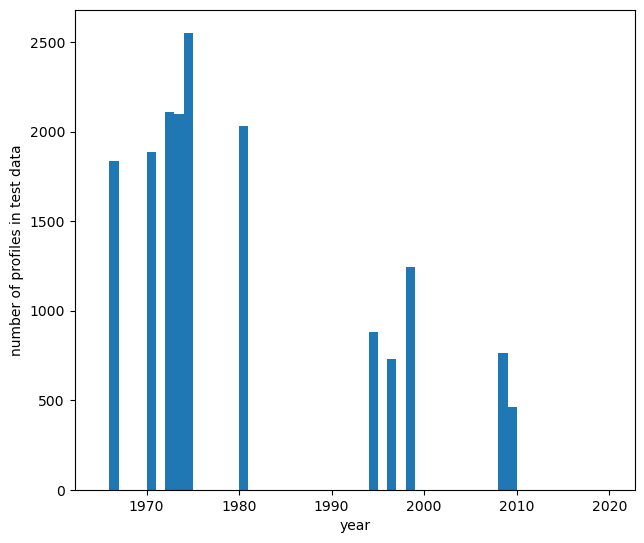

In [18]:
fig=plt.figure(figsize=[7,6])
ax=fig.add_axes([.1,.1,.8,.8])
yrs=np.arange(1965,2021,1)
YR1 = np.round(YR/12+1965)
ind = depth<=10
ax.hist(YR1[ind],yrs)
#
plt.xlabel('year')
plt.ylabel('number of profiles in test data')
plt.savefig(f'test_data_time_v{ver}.pdf',bbox_inches='tight')

In [ ]:
plt.plot(o2test,o2est,'.',markersize=.1)
plt.plot([0,400],[0,400],color='k')
tmp = np.corrcoef(o2test,o2est)
r2 = np.round(tmp[0,1],3)
rmse = np.round(np.sqrt(np.mean((o2test-o2est)**2)),3)
plt.text(30,380,f'R2 ={r2}')
plt.text(30,360,f'RMSE ={rmse}')
plt.xlabel('o2 test data, micro-mol/kg')
plt.ylabel('o2 estimates by algorithm, micro-mol/kg')
plt.title(f'validation, version {ver} ({date2})')
plt.savefig(f'final_validation_v{ver}.pdf',bbox_inches='tight')